# Regresión Lineal

> Fuente: Medical insurance cost

### 📚 Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
import pickle

#### 📂 Importación de datos

In [3]:
df = pd.read_csv("../data/raw/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Tamaño del dataset

In [4]:
df.shape

(1338, 7)

#### Primeras filas del dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Últimas filas del dataset

In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### Evaluacion de datos y verificacion de nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Estadisticas descriptivas de variables numéricas

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Estadisticas descriptivas de variables categóricas

In [10]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


#### Distribucion de variables categóricas

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



#### Conversión de  categóricas a numéricas

In [12]:
df_numerico = pd.get_dummies(df, drop_first=True)
df_numerico.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [13]:
df_numerico = df_numerico.astype(int)

In [14]:
df_factorized = df.copy()
df_factorized['region'] = pd.factorize(df["region"])[0]
df_factorized['smoker'] = pd.factorize(df["smoker"])[0] 
df_factorized['sex'] = pd.factorize(df["sex"])[0]
df_factorized



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


### Heatmap de variables numéricas

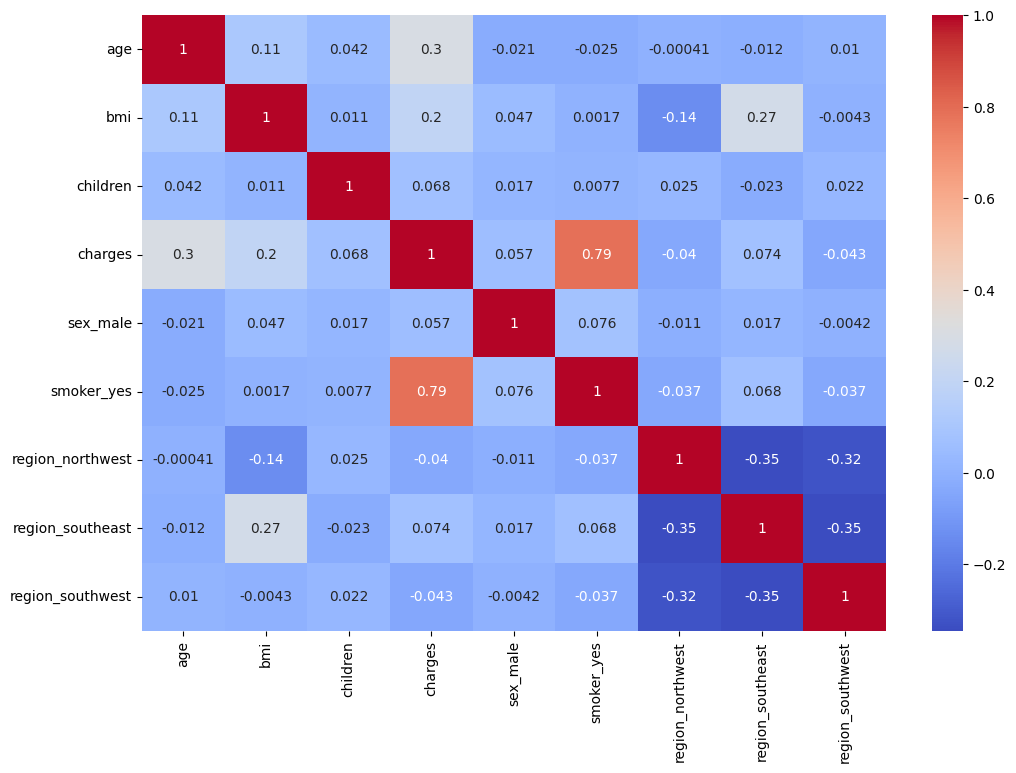

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()

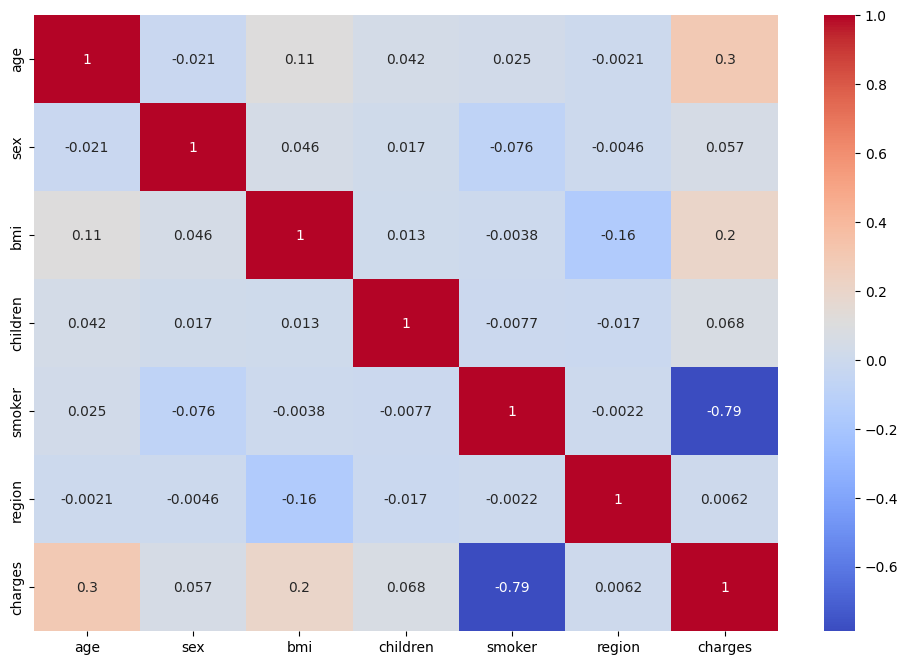

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_factorized.corr(), annot=True, cmap='coolwarm')
plt.show()

#### 📊 Visualización smoker/bmi/edad vs Coste

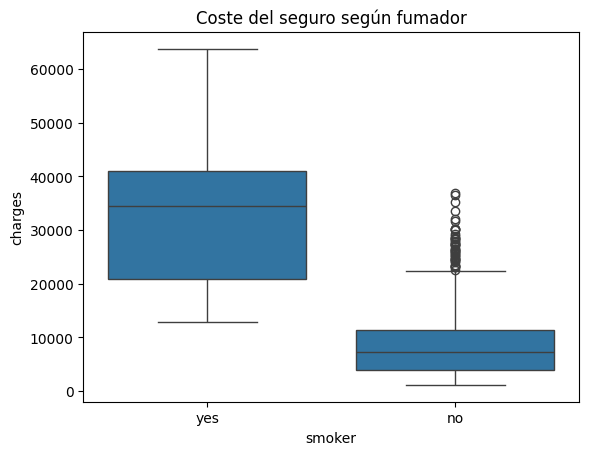

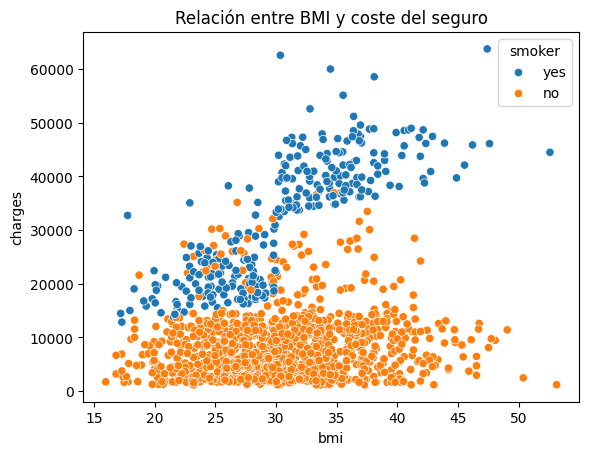

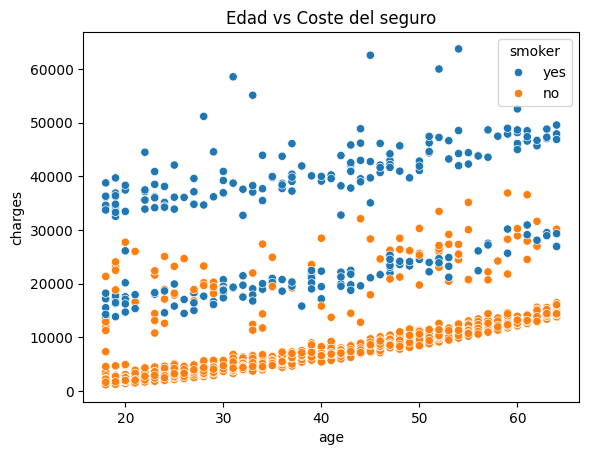

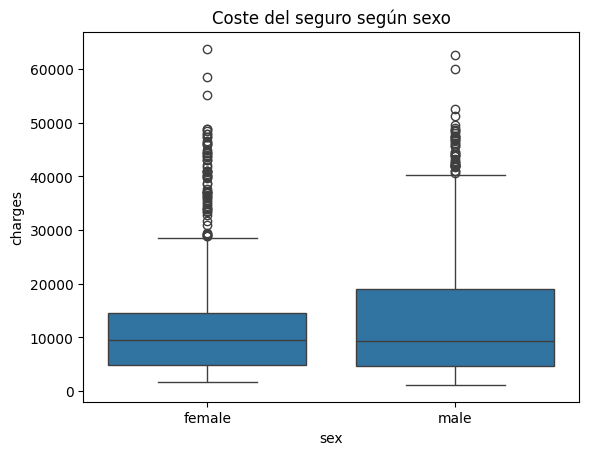

In [17]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Coste del seguro según fumador")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Relación entre BMI y coste del seguro")
plt.show()

sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Edad vs Coste del seguro")
plt.show()

sns.boxplot(x='sex', y='charges', data=df)
plt.title("Coste del seguro según sexo")
plt.show()

### Definición de variables predictoras

In [18]:
X = df_numerico.drop('charges', axis=1)
y = df_numerico['charges']

#### Dividir en conjunto de entrenamiento y prueba

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train.dtypes

age                 int64
bmi                 int64
children            int64
sex_male            int64
smoker_yes          int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

## 📈 Modelo de Regresión Lineal

In [21]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Evaluación de Modelo

In [22]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 0.7837888448800693
RMSE: 5793.655127404497


In [23]:
# 2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R2): {r2:.2f}")

Error cuadrático medio (MSE): 33566439.74
Coeficiente de determinación (R2): 0.78


#### Grabar dataframe

In [25]:
df.to_csv('charge_procesado_1.csv', index=False)

#### Predicción del modelo

In [26]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,45,25,2,0,0,0,0,0
887,36,30,0,0,0,1,0,0
890,64,26,0,0,1,1,0,0
1293,46,25,3,1,0,1,0,0
259,19,31,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...
109,63,35,0,1,1,0,1,0
575,58,27,0,0,0,1,0,0
535,38,28,1,1,0,0,0,0
543,54,47,0,0,1,0,1,0


In [27]:
y_test

764      9095
887      5272
890     29330
1293     9301
259     33750
        ...  
109     47055
575     12222
535      6067
543     63770
846      9872
Name: charges, Length: 268, dtype: int64

In [28]:
y_pred = modelo.predict(X_test)
y_pred

array([ 9087.64215363,  7232.55948323, 36744.39282136,  9390.86060464,
       26835.96961506, 10700.88438873,   176.85511159, 16763.42629132,
        1176.75821394, 11169.05006058, 28141.94818892,  9355.95788892,
        5221.40321606, 38448.8671946 , 40094.17744513, 36935.83914845,
       15154.15405998, 35854.24430695,  9256.40504231, 31345.37256898,
        3720.33899543, 10086.00383365,  2389.24817343,  7018.12055439,
       11443.40843791, 12895.76372111, 14625.6227313 ,  6201.46301286,
        9937.46817478,  2284.12664592,  9180.25612059, 12967.21335176,
        4415.21189286,  3280.78184264,  4616.51137491, 12914.07103691,
        2005.75807266,  8668.775376  , 33415.56094315, 32673.29028852,
        3873.19203608,  4379.17387366, 14024.82770535, 11450.34188499,
        8673.91733215, 12093.78520875,  5238.19686233,  3218.05521838,
       35328.14327403,  9166.62577563, 15884.51962992,  2376.08281379,
       12380.50385494,  1609.23655956, 13396.31680531, 12705.29630435,
      

#### Para comparar el valor predicho del original, podemos realizar un gráfico comparativo como el siguiente:

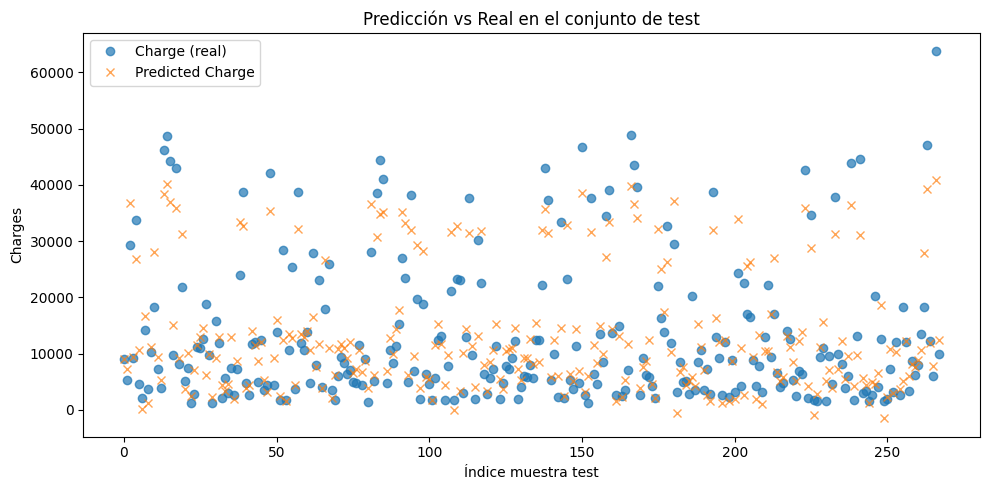

In [29]:
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test.values, label="Charge (real)", marker='o', linestyle='', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label="Predicted Charge", marker='x', linestyle='', alpha=0.7)
plt.xlabel("Índice muestra test")
plt.ylabel("Charges")
plt.title("Predicción vs Real en el conjunto de test")
plt.legend()
plt.tight_layout()
plt.show()

#### Ordenar ambos arrays por valor para linealizar y comparar

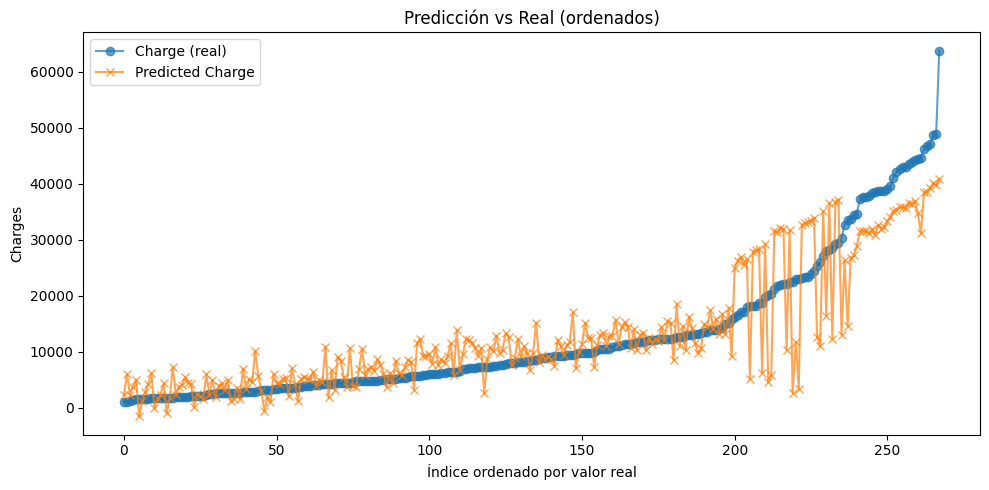

In [30]:
orden = np.argsort(y_test.values)
y_test_sorted = y_test.values[orden]
y_pred_sorted = y_pred[orden]

plt.figure(figsize=(10,5))
plt.plot(y_test_sorted, label="Charge (real)", marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_sorted, label="Predicted Charge", marker='x', linestyle='-', alpha=0.7)
plt.xlabel("Índice ordenado por valor real")
plt.ylabel("Charges")
plt.title("Predicción vs Real (ordenados)")
plt.legend()
plt.tight_layout()
plt.show()

#### Guardar el modelo entrenado en un archivo

In [31]:
with open('/workspaces/ViceVareles_Bea_Intro_ML/models/modelo_regresion_lineal.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)

In [32]:
from sklearn.linear_model import Lasso, Ridge

# Modelo Lasso
modelo_lasso = Lasso(alpha=1.0, random_state=42)
modelo_lasso.fit(X_train, y_train)
y_pred_lasso = modelo_lasso.predict(X_test)
print("Lasso - R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Modelo Ridge
modelo_ridge = Ridge(alpha=1.0, random_state=42)
modelo_ridge.fit(X_train, y_train)
y_pred_ridge = modelo_ridge.predict(X_test)
print("Ridge - R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Lasso - R2 Score: 0.7837330617230449
Lasso - RMSE: 5794.402469812253
Ridge - R2 Score: 0.783469225024175
Ridge - RMSE: 5797.935857890631
